<a href="https://colab.research.google.com/github/Priyankansd/IT-496/blob/main/psiddap_A11_Criticalpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import tensorflow_probability as tfp
tfd =tfp.distributions


In [58]:
tasksDf= pd.read_csv("/content/sample_data/PERT-CPM.csv")
taskNames=tasksDf['tasks']

simulationDF=pd.DataFrame(columns=taskNames)

print(simulationDF.columns)
for index,task in tasksDf.iterrows():
  dist=tfd.PERT(low=task['best'], peak=task['mostL'], high=task['worst'], temperature=4)
  simulationDF[task['tasks']]=dist.sample(1000)
print(simulationDF.head(2))



Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EOP'], dtype='object', name='tasks')
tasks         A         B         C         D         E         F         G  \
0      6.268256  4.705945  2.686948  2.943546  5.806650  3.518733  4.139623   
1      7.816159  5.833167  5.506468  2.053941  5.513869  4.084047  4.512852   

tasks         H          I         J  EOP  
0      2.259581   9.914780  3.730409  NaN  
1      3.364980  10.443825  1.196540  NaN  


In [59]:
paths=['ADEJ','BCDEJ','BCFGJ','BCFHJ','BI']

pathsDF=pd.DataFrame(columns=paths)
ADEJ=[]
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]

for index,row in simulationDF.iterrows():
  ADEJ.append(row['A']+row['D']+row['E']+row['J'])
  BCDEJ.append(row['B']+row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])

pathsDF['ADEJ']=ADEJ
pathsDF['BCDEJ']=BCDEJ
pathsDF['BCFGJ']=BCFGJ
pathsDF['BCFHJ']=BCFHJ
pathsDF['BI']=BI
print(pathsDF.head(2))

        ADEJ      BCDEJ      BCFGJ      BCFHJ         BI
0  18.748861  19.873499  18.781658  16.901617  14.620725
1  16.580509  20.103985  21.133074  19.985201  16.276991


In [60]:
import numpy as np

pathsDF['critical']=pathsDF.select_dtypes(np.number).idxmax(axis=1,skipna=True)
print(pathsDF)

          ADEJ      BCDEJ      BCFGJ      BCFHJ         BI critical
0    18.748861  19.873499  18.781658  16.901617  14.620725    BCDEJ
1    16.580509  20.103985  21.133074  19.985201  16.276991    BCFGJ
2    17.315430  20.116856  18.132812  20.332327   9.341868    BCFHJ
3    16.959684  18.325151  21.145428  18.427435  18.590305    BCFGJ
4    16.614683  19.170599  22.124092  19.071587  18.821754    BCFGJ
..         ...        ...        ...        ...        ...      ...
995  17.803730  20.314585  20.467409  22.171370  19.496910    BCFHJ
996  17.315489  18.941643  17.077730  16.829870  12.955095    BCDEJ
997  19.161476  20.641111  19.125481  22.856279  16.373707    BCFHJ
998  15.848400  19.635410  17.653442  15.393829  23.279795       BI
999  15.247788  19.238682  23.683327  24.037781  10.300129    BCFHJ

[1000 rows x 6 columns]


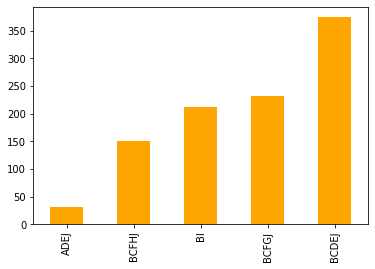

In [62]:
pdDF = pathsDF['critical'].value_counts(ascending=True)
pdDF.plot(kind ='bar', color='orange')
